In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.gridspec import GridSpec
import os

In [2]:
current_working_directory = os.getcwd()
lab_directory = os.path.dirname(current_working_directory)
paper_dir = os.path.join(lab_directory, "paper")
folder_figures = os.path.join(paper_dir, "plots")
folder_tables = os.path.join(paper_dir, "tabelas")

columns_Y = [
    "UpwardUsedSecondaryReserveEnergy",
    "DownwardUsedSecondaryReserveEnergy",
]

data_folder = os.path.join(lab_directory, "data")
espanha_dataset_path = os.path.join(data_folder, "raw", "dados_2014-2022.csv")
portugal_dataset_path = os.path.join(data_folder, "raw", "Secondary.xlsx")
portugal_dataset2_path = os.path.join(data_folder, "raw", "SecundaryUsage.xlsx")

espanha_dataset = pd.read_csv(espanha_dataset_path, index_col=0)

portugal_dataset = pd.read_excel(portugal_dataset_path)
portugal_dataset2 = pd.read_excel(portugal_dataset2_path)


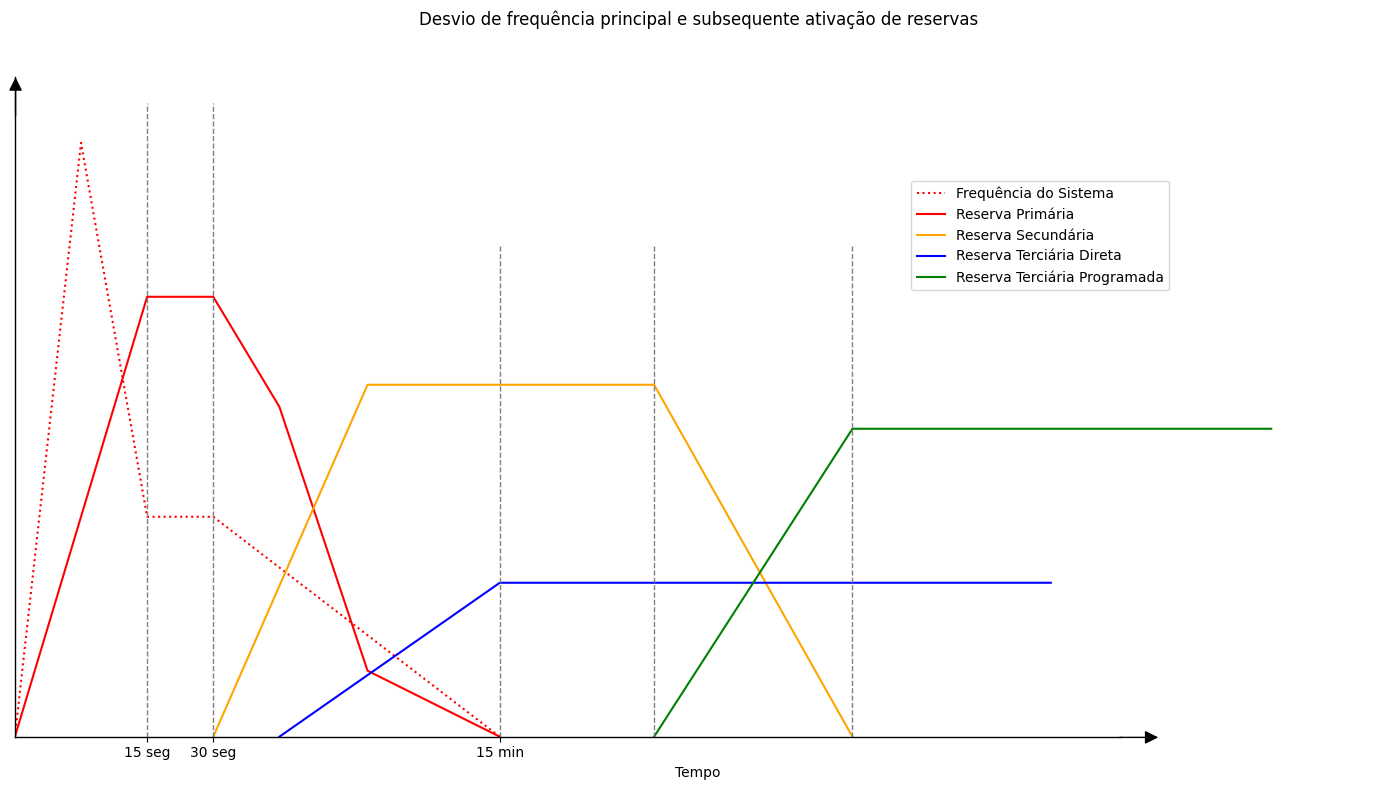

In [123]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Given data
primary_reserve = {
    "x": [0, 30, 45, 60, 80, 110],
    "y": [0, 100, 100, 75, 15, 0]
}
secondary_reserve = {
    "x": [45, 80, 145, 190],
    "y": [0, 80, 80, 0]
}
system_frequency = {
    "x": [0, 15, 30, 45, 110],
    "y": [0, 135, 50, 50, 0]
}
scheduled_tertiary_reserve = {
    "x": [145, 190, 285],
    "y": [0, 70, 70]
}
direct_tertiary_reserve = {
    "x": [60, 110, 235],
    "y": [0, 35, 35]
}

# Extract x and y coordinates
x_pr = primary_reserve["x"]
y_pr = primary_reserve["y"]
x_sr = secondary_reserve["x"]
y_sr = secondary_reserve["y"]
x_sf = system_frequency["x"]
y_sf = system_frequency["y"]
x_str = scheduled_tertiary_reserve["x"]
y_str = scheduled_tertiary_reserve["y"]
x_dtr = direct_tertiary_reserve["x"]
y_dtr = direct_tertiary_reserve["y"]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(x_sf, y_sf,  linestyle=':', color='red', label='Frequência do Sistema')
ax.plot(x_pr, y_pr,  color='red', label='Reserva Primária')
ax.plot(x_sr, y_sr,  linestyle='-', color='orange', label='Reserva Secundária')
ax.plot(x_dtr, y_dtr,  linestyle='-', color='blue', label='Reserva Terciária Direta')
ax.plot(x_str, y_str,  linestyle='-', color='green', label='Reserva Terciária Programada')

# Remove grid and axis ticks
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add dashed vertical lines
ax.axvline(x=30, color='grey', linestyle='--', linewidth=1, ymax=0.9)
ax.axvline(x=45, color='grey', linestyle='--', linewidth=1,ymax=0.9)
ax.axvline(x=110, color='grey', linestyle='--', linewidth=1, ymax=0.7)
ax.axvline(x=145, color='grey', linestyle='--', linewidth=1, ymax=0.7)
ax.axvline(x=190, color='grey', linestyle='--', linewidth=1,ymax=0.7)

# Set title and labels
plt.title('Desvio de frequência principal e subsequente ativação de reservas')
ax.set_xlabel('Tempo')
ax.set_ylabel('')
ax.set_xticks([30, 45, 110])
ax.set_xticklabels(['15 seg', '30 seg', '15 min'])

# Adjust axis limits
plt.xlim(0, 310)
plt.ylim(0, 160)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Create custom arrow spines
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('outward', 0))
ax.spines['left'].set_bounds(0, 150)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('outward', 0))
ax.spines['bottom'].set_bounds(0, 251)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

# Add arrowheads
arrow_length = 25

y_arrow = patches.FancyArrowPatch(
    (0.15, 140.5), (0.15, 150.5),
    arrowstyle='-|>', mutation_scale=20,
    fc='black', ec='black',
    clip_on=False
)
ax.add_patch(y_arrow)

x_arrow = patches.FancyArrowPatch(
    (250, -0.15), (260, -0.15),
    arrowstyle='-|>', mutation_scale=20,
    fc='black', ec='black',
    clip_on=False
)
ax.add_patch(x_arrow)

# Show legend
plt.legend(loc='upper right', bbox_to_anchor=(0.85, 0.8)
)

# Display the plot
plt.tight_layout()
plt.savefig(
    os.path.join(folder_figures, "actiavtion_example.png"),
    bbox_inches="tight",
)
plt.show()


In [124]:
portugal_dataset

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora)
0,2010-01-01,1,190.0,95.0,5953.826,9310.000,NaN
1,2010-01-01,2,185.0,92.0,5419.243,8972.500,NaN
2,2010-01-01,3,178.0,89.0,5051.821,8508.400,NaN
3,2010-01-01,4,112.0,56.0,4838.914,4614.400,NaN
4,2010-01-01,5,107.0,54.0,4712.141,4354.900,NaN
...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN


In [125]:
portugal_dataset2

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,ATRIB_SUBIR,ATRIB_DESCER,PRECO,SECUND_SUBIR,SECUND_DESCER,RESERVA_SUBIR,RESERVA_DESCER,PRECO_SUBIR,PRECO_DESCER,%Necessária,%Usada
0,2011-01-01,1,202.0,101.0,190.0,95.0,18.12,64.10,15.00,0.00,25.62,47.00,0.00,26.105611,27.754386
1,2011-01-01,2,198.0,99.0,214.7,107.3,18.13,124.65,3.10,0.00,121.00,47.00,0.00,43.013468,39.673913
2,2011-01-01,3,194.0,97.0,196.0,98.0,33.49,136.56,0.00,0.00,0.00,51.00,0.00,46.927835,46.448980
3,2011-01-01,4,122.0,61.0,122.0,61.0,33.49,87.83,0.00,161.79,0.00,96.50,0.00,47.994536,47.994536
4,2011-01-01,5,114.0,57.0,114.0,57.0,33.49,21.06,7.50,252.52,0.00,110.50,38.00,16.701754,16.701754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91602,2021-06-13,20,166.0,83.0,174.0,87.0,19.48,38.50,0.00,279.60,470.00,95.66,65.56,15.461847,14.750958
91603,2021-06-13,21,173.0,86.5,181.0,90.5,11.32,66.68,0.00,7.70,215.60,95.66,65.56,25.695568,24.559853
91604,2021-06-13,22,179.0,89.5,187.0,93.5,6.89,11.00,0.91,0.00,378.00,0.00,70.07,4.435754,4.245989
91605,2021-06-13,23,184.5,92.3,193.0,96.5,5.68,20.56,0.00,0.00,359.50,0.00,70.07,7.427746,7.101900


In [143]:
horas_25 = portugal_dataset[portugal_dataset["HORA"] == 25].index
portugal_dataset.drop(horas_25, inplace=True)
portugal_dataset.loc[portugal_dataset["HORA"] == 24, "HORA"]=0


horas_25 = portugal_dataset2[portugal_dataset2["HORA"] == 25].index
portugal_dataset2.drop(horas_25, inplace=True)
portugal_dataset2.loc[portugal_dataset2["HORA"] == 24, "HORA"]=0

In [144]:
espanha_dataset["datetime"] = pd.to_datetime(espanha_dataset["datetime"])

In [145]:
portugal_dataset["HORA"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0])

In [146]:
import pandas as pd
from datetime import timezone

# Convert DATA column to datetime if not already
portugal_dataset['DATA'] = pd.to_datetime(portugal_dataset['DATA'])

# Create a new column 'datetime' combining DATA and HORA with UTC timezone
portugal_dataset['datetime'] = portugal_dataset.apply(
    lambda row: row['DATA'].replace(hour=int(row['HORA']), tzinfo=timezone.utc),
    axis=1
)


In [147]:
# Convert DATA column to datetime if not already
portugal_dataset2['DATA'] = pd.to_datetime(portugal_dataset2['DATA'])

# Create a new column 'datetime' combining DATA and HORA with UTC timezone
portugal_dataset2['datetime'] = portugal_dataset2.apply(
    lambda row: row['DATA'].replace(hour=int(row['HORA']), tzinfo=timezone.utc),
    axis=1
)


In [148]:
espanha_dataset = espanha_dataset[espanha_dataset['datetime'].isin(portugal_dataset["datetime"])]
portugal_dataset = portugal_dataset[portugal_dataset['datetime'].isin(espanha_dataset["datetime"])]
portugal_dataset2 = portugal_dataset2[portugal_dataset2['datetime'].isin(portugal_dataset["datetime"])]
portugal_dataset = portugal_dataset[portugal_dataset['datetime'].isin(portugal_dataset2["datetime"])]
espanha_dataset = espanha_dataset[espanha_dataset['datetime'].isin(portugal_dataset["datetime"])]


In [157]:
portugal_dataset.dropna(axis=1)

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,datetime,BR
35062,2013-12-31,23,160.0,80.0,5843.436,7360.000,2013-12-31 23:00:00+00:00,240.0
35064,2014-01-01,1,199.5,99.8,5425.605,9965.025,2014-01-01 01:00:00+00:00,299.3
35065,2014-01-01,2,184.0,92.0,5044.036,8905.600,2014-01-01 02:00:00+00:00,276.0
35066,2014-01-01,3,151.0,75.5,4745.401,6810.100,2014-01-01 03:00:00+00:00,226.5
35067,2014-01-01,4,132.5,66.3,4531.224,5730.625,2014-01-01 04:00:00+00:00,198.8
...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,2018-12-31 20:00:00+00:00,276.8
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,2018-12-31 21:00:00+00:00,273.8
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,2018-12-31 22:00:00+00:00,258.8
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,2018-12-31 23:00:00+00:00,240.8


In [151]:
for col in ["ATRIB_SUBIR","ATRIB_DESCER","SECUND_SUBIR" ,"SECUND_DESCER"]:

    portugal_dataset[col] = portugal_dataset2[col]

In [152]:
a = portugal_dataset[portugal_dataset["DATA"].dt.year==2016]
b = a[a["DATA"].dt.day.isin([18,19])]
b[b["DATA"].dt.month==1]

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),datetime,ATRIB_SUBIR,ATRIB_DESCER,SECUND_SUBIR,SECUND_DESCER
52992,2016-01-18,1,220.0,110.0,5893.200,11440.000,NaN,2016-01-18 01:00:00+00:00,189.0,94.5,14.20,4.21
52993,2016-01-18,2,195.0,97.5,5365.591,9652.500,NaN,2016-01-18 02:00:00+00:00,166.0,83.0,135.24,0.00
52994,2016-01-18,3,162.5,81.3,5079.468,7515.625,NaN,2016-01-18 03:00:00+00:00,133.0,66.5,120.88,0.00
52995,2016-01-18,4,145.0,72.5,4950.275,6452.500,NaN,2016-01-18 04:00:00+00:00,110.0,55.0,17.60,0.00
52996,2016-01-18,5,130.5,65.3,4861.456,5618.025,NaN,2016-01-18 05:00:00+00:00,93.0,46.5,52.60,0.00
52997,2016-01-18,6,129.5,64.8,4815.795,5562.025,NaN,2016-01-18 06:00:00+00:00,93.0,46.5,20.60,0.00
52998,2016-01-18,7,152.5,76.3,4753.658,6900.625,NaN,2016-01-18 07:00:00+00:00,110.0,55.0,109.90,0.00
52999,2016-01-18,8,180.5,90.3,4723.375,8673.025,NaN,2016-01-18 08:00:00+00:00,143.0,71.5,0.00,37.22
53000,2016-01-18,9,204.5,102.3,5151.792,10317.025,NaN,2016-01-18 09:00:00+00:00,221.0,110.5,2.14,49.20
53001,2016-01-18,10,196.5,98.3,5985.748,9756.225,NaN,2016-01-18 10:00:00+00:00,201.0,100.5,85.78,0.00


In [153]:
portugal_dataset["BR"]=portugal_dataset["BANDA_SUBIR"]+portugal_dataset["BANDA_DESCER"]
portugal_dataset["ATRIB_BR"]=portugal_dataset["ATRIB_SUBIR"]+portugal_dataset["ATRIB_DESCER"]
portugal_dataset["USADA_BR"]=portugal_dataset["SECUND_SUBIR"]+portugal_dataset["SECUND_DESCER"]

In [116]:
7936

7936

In [134]:
portugal_dataset["cons"]=(np.square(portugal_dataset["BR"]+150)-(150*150))/10

In [154]:
portugal_dataset

,DATA,HORA,BANDA_SUBIR,BANDA_DESCER,Consumo real,Consumo Máximo ENTSO-E,Consumo máximo Portugal= ENTSOE/p(hora),datetime,ATRIB_SUBIR,ATRIB_DESCER,SECUND_SUBIR,SECUND_DESCER,BR,ATRIB_BR,USADA_BR
35062,2013-12-31,23,160.0,80.0,5843.436,7360.000,NaN,2013-12-31 23:00:00+00:00,154.0,77.0,0.00,29.22,240.0,231.0,29.22
35064,2014-01-01,1,199.5,99.8,5425.605,9965.025,NaN,2014-01-01 01:00:00+00:00,208.0,104.0,58.61,0.00,299.3,312.0,58.61
35065,2014-01-01,2,184.0,92.0,5044.036,8905.600,NaN,2014-01-01 02:00:00+00:00,201.0,100.5,138.96,0.00,276.0,301.5,138.96
35066,2014-01-01,3,151.0,75.5,4745.401,6810.100,NaN,2014-01-01 03:00:00+00:00,171.0,85.5,0.00,28.47,226.5,256.5,28.47
35067,2014-01-01,4,132.5,66.3,4531.224,5730.625,NaN,2014-01-01 04:00:00+00:00,151.0,75.5,0.00,23.54,198.8,226.5,23.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78883,2018-12-31,20,184.5,92.3,6382.619,8939.025,NaN,2018-12-31 20:00:00+00:00,NaN,NaN,NaN,NaN,276.8,NaN,NaN
78884,2018-12-31,21,182.5,91.3,6396.562,8805.625,NaN,2018-12-31 21:00:00+00:00,NaN,NaN,NaN,NaN,273.8,NaN,NaN
78885,2018-12-31,22,172.5,86.3,6316.375,8150.625,NaN,2018-12-31 22:00:00+00:00,NaN,NaN,NaN,NaN,258.8,NaN,NaN
78886,2018-12-31,23,160.5,80.3,6400.275,7391.025,NaN,2018-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,240.8,NaN,NaN


<Axes: >

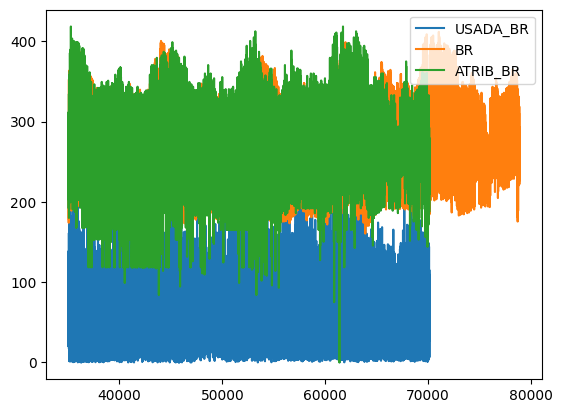

In [155]:
#portugal_dataset["BR"]
#portugal_dataset["ATRIB_BR"]
#portugal_dataset["USADA_BR"]


portugal_dataset[["USADA_BR","BR","ATRIB_BR"]].plot()

In [169]:
dataset = portugal_dataset[["BR","USADA_BR", "datetime"]].dropna()

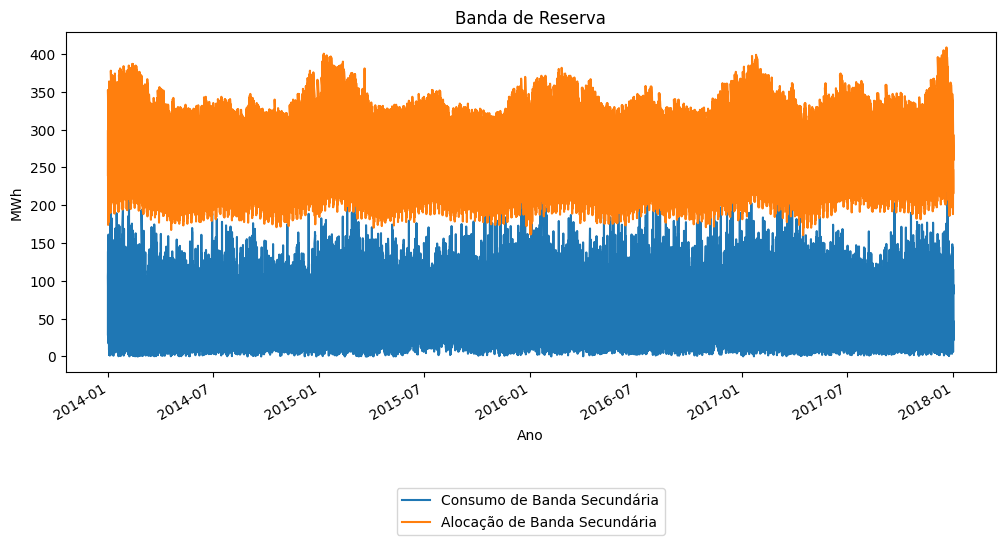

In [170]:
nrows = 1
ncols = 1

count = 0
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5))

test_col = "BR"
benchmark_col = "USADA_BR"

# Adjust the vertical spacing here
plt.subplots_adjust(hspace=0.8)
ax = axis

# Check target distribution
dataset.set_index("datetime")[benchmark_col].plot(ax=ax, label="Consumo de Banda Secundária")
dataset.set_index("datetime")[test_col].plot(ax=ax, label="Alocação de Banda Secundária")

ax.set_title("Banda de Reserva")
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Set x-axis label to "Ano"
ax.set_xlabel("Ano")
# Set y-axis label to "MWh"
ax.set_ylabel("MWh")


plt.legend(bbox_to_anchor=(0.5, -0.5), loc="lower center")

# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
fig.savefig(
    os.path.join(folder_figures, "pt_alocacoes_validacao.png"),
    bbox_inches="tight",
)

In [178]:
portugal_dataset_month_sum = portugal_dataset[["BR","USADA_BR", "datetime"]].dropna().set_index("datetime").resample("1ME").sum()
portugal_dataset_month_sum=portugal_dataset_month_sum[portugal_dataset_month_sum.index.year>2013]

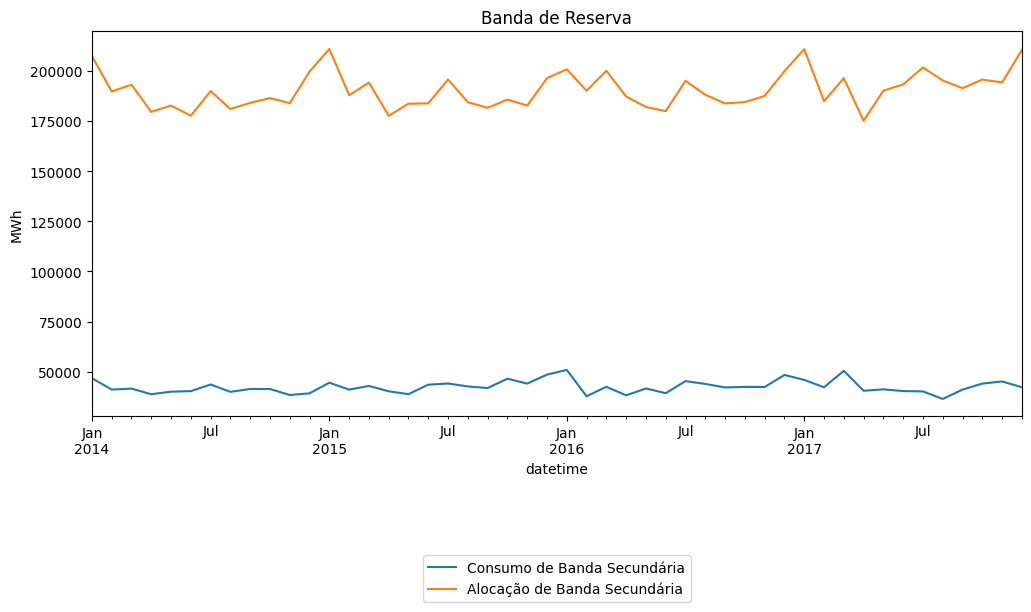

In [180]:
nrows = 1
ncols = 1

count = 0
fig, axis = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5))

test_col = "BR"
benchmark_col = "USADA_BR"

# Adjust the vertical spacing here
plt.subplots_adjust(hspace=0.8)
ax = axis

# Check target distribution
portugal_dataset_month_sum[benchmark_col].plot(ax=ax, label="Consumo de Banda Secundária")
portugal_dataset_month_sum[test_col].plot(ax=ax, label="Alocação de Banda Secundária")

ax.set_title("Banda de Reserva")
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Set x-axis label to "Ano"
#ax.set_xlabel("Ano")
# Set y-axis label to "MWh"
ax.set_ylabel("MWh")


plt.legend(bbox_to_anchor=(0.5, -0.5), loc="lower center")

# plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
fig.savefig(
    os.path.join(folder_figures, "pt_alocacoes_month_validacao.png"),
    bbox_inches="tight",
)

In [362]:
pathone = "/home/joao/Transferências/EnergiaReservaRegula.xlsx"
pathtwo = "/home/joao/Transferências/BandaSec.xlsx"
pathtrhe="/home/joao/Transferências/ConsumoVerifElectr(1).xlsx"
EnergiaReservaRegula = pd.read_excel(pathone)
BandaSec = pd.read_excel(pathtwo)
ConsumoVerifElectr = pd.read_excel(pathtrhe)

EnergiaReservaRegula = EnergiaReservaRegula[["Reserva Secundária - Ativada PT - Subir [MWh]", "Reserva Secundária - Ativada PT - Descer [MWh]", "Data", "Hora"]]
ConsumoVerifElectr=ConsumoVerifElectr[["Data", "Hora", "Consumo [MWh]"]]

In [363]:
EnergiaReservaRegula

,Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Data,Hora
0,79.90,20.90,2008-07-01,1
1,17.40,33.30,2008-07-01,2
2,26.60,0.00,2008-07-01,3
3,74.10,0.00,2008-07-01,4
4,61.80,4.20,2008-07-01,5
...,...,...,...,...
135884,161.72,0.00,2023-12-31,20
135885,0.00,16.09,2023-12-31,21
135886,0.00,51.80,2023-12-31,22
135887,0.00,45.93,2023-12-31,23


In [364]:
BandaSec

,Data,Hora,Necessidade Banda Subir [MW],Necessidade Banda Descer [MW],Banda Contratada Subir [MW],Banda Contratada Descer [MW],Banda Extraordinária Subir [MW],Banda Extraordinária Descer [MW],Preço [€/MW]
0,2008-01-01,1,127.0,64.0,84.0,42.0,0.0,0.0,21.31
1,2008-01-01,2,126.0,63.0,84.0,42.0,0.0,0.0,21.31
2,2008-01-01,3,122.0,61.0,66.0,33.0,0.0,0.0,21.31
3,2008-01-01,4,115.0,58.0,NaN,NaN,NaN,NaN,0.00
4,2008-01-01,5,108.0,54.0,80.0,40.0,0.0,0.0,23.00
...,...,...,...,...,...,...,...,...,...
140251,2023-12-31,20,194.3,97.1,200.0,100.0,0.0,0.0,13.10
140252,2023-12-31,21,193.3,96.6,200.0,100.0,0.0,0.0,17.12
140253,2023-12-31,22,184.8,92.4,192.0,96.0,0.0,0.0,15.01
140254,2023-12-31,23,176.0,88.0,183.0,91.5,0.0,0.0,28.30


In [365]:
ConsumoVerifElectr

,Data,Hora,Consumo [MWh]
0,2008-01-01,1,5755.192
1,2008-01-01,2,5504.134
2,2008-01-01,3,5297.817
3,2008-01-01,4,4935.400
4,2008-01-01,5,4593.632
...,...,...,...
131515,2023-12-31,20,7430.456
131516,2023-12-31,21,7355.778
131517,2023-12-31,22,6661.684
131518,2023-12-31,23,6075.737


In [366]:
BandaSecundaria = pd.merge(BandaSec,EnergiaReservaRegula, on=["Data", "Hora"])
BandaSecundaria = pd.merge(BandaSecundaria,ConsumoVerifElectr, on=["Data", "Hora"])
BandaSecundaria = BandaSecundaria[["Data", "Hora", 'Necessidade Banda Subir [MW]',
       'Necessidade Banda Descer [MW]', 'Banda Contratada Subir [MW]',
       'Banda Contratada Descer [MW]','Reserva Secundária - Ativada PT - Subir [MWh]',
       'Reserva Secundária - Ativada PT - Descer [MWh]', "Consumo [MWh]"]]


In [367]:
BandaSecundaria.dropna()

,Data,Hora,Necessidade Banda Subir [MW],Necessidade Banda Descer [MW],Banda Contratada Subir [MW],Banda Contratada Descer [MW],Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Consumo [MWh]
0,2008-07-01,1,131.0,65.0,130.0,65.0,79.90,20.90,5953.826
1,2008-07-01,2,126.0,63.0,120.0,60.0,17.40,33.30,5419.243
2,2008-07-01,3,120.0,60.0,96.0,48.0,26.60,0.00,5051.821
3,2008-07-01,4,116.0,58.0,96.0,48.0,74.10,0.00,4838.914
4,2008-07-01,5,113.0,57.0,96.0,48.0,61.80,4.20,4712.141
...,...,...,...,...,...,...,...,...,...
127148,2023-12-31,20,194.3,97.1,200.0,100.0,161.72,0.00,7430.456
127149,2023-12-31,21,193.3,96.6,200.0,100.0,0.00,16.09,7355.778
127150,2023-12-31,22,184.8,92.4,192.0,96.0,0.00,51.80,6661.684
127151,2023-12-31,23,176.0,88.0,183.0,91.5,0.00,45.93,6075.737


In [368]:
horas_25 = BandaSecundaria[BandaSecundaria["Hora"] == 25].index
BandaSecundaria.drop(horas_25, inplace=True)
BandaSecundaria.loc[BandaSecundaria["Hora"] == 24, "Hora"]=0

# Convert DATA column to datetime if not already
BandaSecundaria['Data'] = pd.to_datetime(BandaSecundaria['Data'])

# Create a new column 'datetime' combining DATA and HORA with UTC timezone
BandaSecundaria['datetime'] = BandaSecundaria.apply(
    lambda row: row['Data'].replace(hour=int(row['Hora']), tzinfo=timezone.utc),
    axis=1
)


In [369]:
BandaSecundaria=BandaSecundaria.set_index("datetime")

In [370]:
BandaSecundaria

,Data,Hora,Necessidade Banda Subir [MW],Necessidade Banda Descer [MW],Banda Contratada Subir [MW],Banda Contratada Descer [MW],Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Consumo [MWh]
datetime,,,,,,,,,
2008-07-01 01:00:00+00:00,2008-07-01,1,131.0,65.0,130.0,65.0,79.90,20.90,5953.826
2008-07-01 02:00:00+00:00,2008-07-01,2,126.0,63.0,120.0,60.0,17.40,33.30,5419.243
2008-07-01 03:00:00+00:00,2008-07-01,3,120.0,60.0,96.0,48.0,26.60,0.00,5051.821
2008-07-01 04:00:00+00:00,2008-07-01,4,116.0,58.0,96.0,48.0,74.10,0.00,4838.914
2008-07-01 05:00:00+00:00,2008-07-01,5,113.0,57.0,96.0,48.0,61.80,4.20,4712.141
...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00+00:00,2023-12-31,20,194.3,97.1,200.0,100.0,161.72,0.00,7430.456
2023-12-31 21:00:00+00:00,2023-12-31,21,193.3,96.6,200.0,100.0,0.00,16.09,7355.778
2023-12-31 22:00:00+00:00,2023-12-31,22,184.8,92.4,192.0,96.0,0.00,51.80,6661.684


In [371]:
BandaSecundaria["Necessidade Banda Reserva"] = BandaSecundaria["Necessidade Banda Subir [MW]"]+BandaSecundaria["Necessidade Banda Descer [MW]"]
BandaSecundaria["Banda Reserva Contractada"] = BandaSecundaria["Banda Contratada Subir [MW]"]+BandaSecundaria["Banda Contratada Descer [MW]"]
BandaSecundaria["Banda Reserva Ativada"] = BandaSecundaria["Reserva Secundária - Ativada PT - Subir [MWh]"]+BandaSecundaria["Reserva Secundária - Ativada PT - Descer [MWh]"]


In [149]:
BandaSecundaria["erro"] =  BandaSecundaria["Necessidade Banda Reserva"] - BandaSecundaria["Banda Reserva Ativada"]


In [373]:
BandaSecundaria

,Data,Hora,Necessidade Banda Subir [MW],Necessidade Banda Descer [MW],Banda Contratada Subir [MW],Banda Contratada Descer [MW],Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Consumo [MWh],Necessidade Banda Reserva,Banda Reserva Contractada,Banda Reserva Ativada,erro
datetime,,,,,,,,,,,,,
2008-07-01 01:00:00+00:00,2008-07-01,1,131.0,65.0,130.0,65.0,79.90,20.90,5953.826,196.0,195.0,100.80,95.20
2008-07-01 02:00:00+00:00,2008-07-01,2,126.0,63.0,120.0,60.0,17.40,33.30,5419.243,189.0,180.0,50.70,138.30
2008-07-01 03:00:00+00:00,2008-07-01,3,120.0,60.0,96.0,48.0,26.60,0.00,5051.821,180.0,144.0,26.60,153.40
2008-07-01 04:00:00+00:00,2008-07-01,4,116.0,58.0,96.0,48.0,74.10,0.00,4838.914,174.0,144.0,74.10,99.90
2008-07-01 05:00:00+00:00,2008-07-01,5,113.0,57.0,96.0,48.0,61.80,4.20,4712.141,170.0,144.0,66.00,104.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00+00:00,2023-12-31,20,194.3,97.1,200.0,100.0,161.72,0.00,7430.456,291.4,300.0,161.72,129.68
2023-12-31 21:00:00+00:00,2023-12-31,21,193.3,96.6,200.0,100.0,0.00,16.09,7355.778,289.9,300.0,16.09,273.81
2023-12-31 22:00:00+00:00,2023-12-31,22,184.8,92.4,192.0,96.0,0.00,51.80,6661.684,277.2,288.0,51.80,225.40


In [374]:
#BandaSecundaria.to_csv(os.path.join(data_folder, "processed", "Banda_secundaria_2008-2023.csv"))

In [202]:
BandaSecundaria = pd.read_csv(os.path.join(data_folder, "processed", "Banda_secundaria_2008-2023.csv"))

In [203]:
BandaSecundaria["datetime"]=pd.to_datetime(BandaSecundaria["datetime"])

In [204]:
BandaSecundaria=BandaSecundaria.set_index("datetime")

In [205]:
BandaSecundaria["erro"] =  BandaSecundaria["Banda Reserva Contractada"] - BandaSecundaria["Banda Reserva Ativada"]


In [206]:
number_cols = ['Necessidade Banda Subir [MW]',
       'Necessidade Banda Descer [MW]', 'Banda Contratada Subir [MW]',
       'Banda Contratada Descer [MW]',
       'Reserva Secundária - Ativada PT - Subir [MWh]',
       'Reserva Secundária - Ativada PT - Descer [MWh]', 'Consumo [MWh]',
       'Necessidade Banda Reserva', 'Banda Reserva Contractada',
       'Banda Reserva Ativada', 'erro']

In [207]:
BandaSecundaria_media = BandaSecundaria[BandaSecundaria.index.year>2012][number_cols].abs().mean().to_frame().T
BandaSecundaria_media["erro \%"] = BandaSecundaria_media["erro"] /BandaSecundaria_media["Banda Reserva Ativada"]
BandaSecundaria_media["erro \%"] = BandaSecundaria_media["erro \%"] * 100


<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_16727/446623840.py:2: SyntaxWarning: invalid escape sequence '\%'
  BandaSecundaria_media["erro \%"] = BandaSecundaria_media["erro"] /BandaSecundaria_media["Banda Reserva Ativada"]
/tmp/ipykernel_16727/446623840.py:3: SyntaxWarning: invalid escape sequence '\%'
  BandaSecundaria_media["erro \%"] = BandaSecundaria_media["erro \%"] * 100
/tmp/ipykernel_16727/446623840.py:3: SyntaxWarning: invalid escape sequence '\%'
  BandaSecundaria_media["erro \%"] = BandaSecundaria_media["erro \%"] * 100


In [208]:
bench_table = BandaSecundaria_media[["Banda Reserva Contractada", "Banda Reserva Ativada", "erro", "erro \%"]]

<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_16727/3948781425.py:1: SyntaxWarning: invalid escape sequence '\%'
  bench_table = BandaSecundaria_media[["Banda Reserva Contractada", "Banda Reserva Ativada", "erro", "erro \%"]]


In [209]:
bench_table=bench_table.rename({
    "Banda Reserva Contractada":"Banda de Reserva Alocada",
    "Banda Reserva Ativada":"Banda Reserva Activada"

}, axis=1)

In [210]:
bench_table

,Banda de Reserva Alocada,Banda Reserva Activada,erro,erro \%
0,271.568497,50.53173,221.040342,437.428805


In [211]:
bench_table.to_latex(
    os.path.join(folder_tables, "tabela_media_banda_portugal.tex"),
    escape=False,   index=False,
    float_format="%.2f",
)

In [171]:
#BandaSecundaria = BandaSecundaria.set_index("datetime")
#BandaSecundaria = BandaSecundaria.drop(["Data","Hora"], axis=1)

In [ ]:
media_horaria = BandaSecundaria.groupby("Hora").mean()

In [ ]:
media_horaria = media_horaria[["Necessidade Banda Reserva", "Banda Reserva Ativada"]]
media_horaria["erro"] =  media_horaria["Necessidade Banda Reserva"] - media_horaria["Banda Reserva Ativada"]
media_horaria["erro \%"] = (media_horaria["Necessidade Banda Reserva"]- media_horaria["Banda Reserva Ativada"])/media_horaria["Banda Reserva Ativada"]
media_horaria["erro \%"] = media_horaria["erro \%"] * 100

In [284]:
media_horaria

,Necessidade Banda Reserva,Banda Reserva Ativada,erro,erro \%
Hora,,,,
0,318.200195,59.554885,258.645310,434.297387
1,302.372201,53.150856,249.221344,468.894315
2,279.961074,56.848875,223.112199,392.465457
3,248.352826,43.618001,204.734824,469.381489
4,214.487937,46.065624,168.422313,365.613872
5,203.421600,46.948648,156.472952,333.285322
6,201.455775,47.419289,154.036486,324.839296
7,233.140728,49.625066,183.515662,369.804367
8,256.446927,57.166700,199.280227,348.594949


In [173]:
BandaSecundaria

,Data,Hora,Necessidade Banda Subir [MW],Necessidade Banda Descer [MW],Banda Contratada Subir [MW],Banda Contratada Descer [MW],Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Consumo [MWh],Necessidade Banda Reserva,Banda Reserva Contractada,Banda Reserva Ativada,erro
datetime,,,,,,,,,,,,,
2008-07-01 01:00:00+00:00,2008-07-01,1,131.0,65.0,130.0,65.0,79.90,20.90,5953.826,196.0,195.0,100.80,95.20
2008-07-01 02:00:00+00:00,2008-07-01,2,126.0,63.0,120.0,60.0,17.40,33.30,5419.243,189.0,180.0,50.70,138.30
2008-07-01 03:00:00+00:00,2008-07-01,3,120.0,60.0,96.0,48.0,26.60,0.00,5051.821,180.0,144.0,26.60,153.40
2008-07-01 04:00:00+00:00,2008-07-01,4,116.0,58.0,96.0,48.0,74.10,0.00,4838.914,174.0,144.0,74.10,99.90
2008-07-01 05:00:00+00:00,2008-07-01,5,113.0,57.0,96.0,48.0,61.80,4.20,4712.141,170.0,144.0,66.00,104.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00+00:00,2023-12-31,20,194.3,97.1,200.0,100.0,161.72,0.00,7430.456,291.4,300.0,161.72,129.68
2023-12-31 21:00:00+00:00,2023-12-31,21,193.3,96.6,200.0,100.0,0.00,16.09,7355.778,289.9,300.0,16.09,273.81
2023-12-31 22:00:00+00:00,2023-12-31,22,184.8,92.4,192.0,96.0,0.00,51.80,6661.684,277.2,288.0,51.80,225.40


In [ ]:
data

In [181]:
data_for_table = (
    BandaSecundaria.reset_index()[
        [
            "Necessidade Banda Subir [MW]",
            "Necessidade Banda Descer [MW]",
            "Consumo [MWh]",
           # "Consumo Máximo ENTSO-E",
        ]
    ]
    .iloc[:1]
    .T
)
data_for_table.index.names = ["Nome"]

In [182]:
data_for_table["Unidades"] = ["MW", "MW", #"MW"
                              "MWh"]
#data_for_table["Indicador REN"] = []
data_for_table["Nome"] = data_for_table.index
data_for_table = data_for_table[["Nome", "Unidades"]]

In [212]:
data_for_table

,Nome,Unidades
Nome,,
Necessidade Banda Subir [MW],Necessidade Banda Subir [MW],MW
Necessidade Banda Descer [MW],Necessidade Banda Descer [MW],MW
Consumo [MWh],Consumo [MWh],MWh


In [214]:
data_for_table.to_latex(os.path.join(folder_tables,"tabela_dados_estudo_1_variaveis.tex"),
    escape=False,
    index=False,
    float_format="%.2f",
)

In [216]:


table_training=BandaSecundaria.reset_index()[
        [
            "Necessidade Banda Subir [MW]",
            "Necessidade Banda Descer [MW]",
            "Consumo [MWh]",
           # "Consumo Máximo ENTSO-E",
        ]]


media = table_training.mean().to_frame().T
media["Análise"] = "média"
desvio = table_training.std().to_frame().T
desvio["Análise"] = "desvio padrão"
minimo = table_training.min().to_frame().T
minimo["Análise"] = "min"
maximo = table_training.max().to_frame().T
maximo["Análise"] = "max"
table_training_tabela = pd.concat([media, desvio, minimo, maximo], ignore_index=True).set_index("Análise")
table_training_tabela.index.names = [None]


In [217]:
table_training_tabela = table_training_tabela.T

In [218]:
table_training_tabela

,média,desvio padrão,min,max
Necessidade Banda Subir [MW],177.440775,30.744507,0.000,415.000
Necessidade Banda Descer [MW],88.747453,15.367961,0.000,207.500
Consumo [MWh],5672.761077,1012.193485,3159.653,9827.797


In [220]:
table_training_tabela.to_latex(os.path.join(folder_tables,"tabela_tuga_medias.tex"), escape=False, #index=False, 
                               float_format="%.2f")

In [303]:
espanha_dataset = pd.read_csv(espanha_dataset_path, index_col=0)


In [304]:
espanha_dataset.columns

Index(['SecondaryReserveAllocationAUpward',
       'SecondaryReserveAllocationADownward',
       'UpwardUsedSecondaryReserveEnergy',
       'DownwardUsedSecondaryReserveEnergy', 'WindD+1DailyForecast',
       'PhotovoltaicD+1DailyForecast', 'DemandD+1DailyForecast',
       'TotalBaseDailyOperatingSchedulePBFGeneration',
       'BaseDailyOperatingSchedulePBFSolarPV',
       'BaseDailyOperatingSchedulePBFWind',
       'BaseDailyOperatingShedulePBFTotalBalanceInterconnections', 'datetime'],
      dtype='object')

In [305]:
BandaSecundaria_espanha = espanha_dataset[['SecondaryReserveAllocationAUpward',
       'SecondaryReserveAllocationADownward',
       'UpwardUsedSecondaryReserveEnergy',
       'DownwardUsedSecondaryReserveEnergy', "datetime"]]

In [306]:
BandaSecundaria_espanha

,SecondaryReserveAllocationAUpward,SecondaryReserveAllocationADownward,UpwardUsedSecondaryReserveEnergy,DownwardUsedSecondaryReserveEnergy,datetime
0,684.0,595.0,57.2,209.8,2013-12-31 23:00:00+00:00
1,586.0,496.0,873.3,7.2,2014-01-01 00:00:00+00:00
2,499.0,499.0,481.2,5.9,2014-01-01 01:00:00+00:00
3,497.0,384.0,13.9,217.5,2014-01-01 02:00:00+00:00
4,496.0,381.0,0.0,165.9,2014-01-01 03:00:00+00:00
...,...,...,...,...,...
85965,897.0,898.0,274.6,97.9,2023-10-24 17:00:00+00:00
85966,798.0,798.0,253.9,249.9,2023-10-24 18:00:00+00:00
85967,797.0,797.0,250.5,79.3,2023-10-24 19:00:00+00:00
85968,799.0,799.0,358.3,38.5,2023-10-24 20:00:00+00:00


In [307]:
BandaSecundaria_espanha["datetime"]=pd.to_datetime(BandaSecundaria_espanha["datetime"])
BandaSecundaria_espanha=BandaSecundaria_espanha.set_index("datetime")

/tmp/ipykernel_70530/647011174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BandaSecundaria_espanha["datetime"]=pd.to_datetime(BandaSecundaria_espanha["datetime"])


In [308]:
BandaSecundaria_espanha["erro_up"] =  BandaSecundaria_espanha["SecondaryReserveAllocationAUpward"] - BandaSecundaria_espanha["UpwardUsedSecondaryReserveEnergy"]
BandaSecundaria_espanha["erro_down"] =  BandaSecundaria_espanha["SecondaryReserveAllocationADownward"] - BandaSecundaria_espanha["DownwardUsedSecondaryReserveEnergy"]


In [311]:
BandaSecundaria_espanha_media = BandaSecundaria_espanha[BandaSecundaria_espanha.index.year>2012].mean().to_frame().T
BandaSecundaria_espanha_media["erro up \%"] = BandaSecundaria_espanha_media["erro_up"] /BandaSecundaria_espanha_media["UpwardUsedSecondaryReserveEnergy"]
BandaSecundaria_espanha_media["erro up \%"] = BandaSecundaria_espanha_media["erro up \%"] * 100


BandaSecundaria_espanha_media["erro down \%"] = BandaSecundaria_espanha_media["erro_down"] /BandaSecundaria_espanha_media["DownwardUsedSecondaryReserveEnergy"]
BandaSecundaria_espanha_media["erro down \%"] = BandaSecundaria_espanha_media["erro down \%"] * 100


<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_70530/73260764.py:2: SyntaxWarning: invalid escape sequence '\%'
  BandaSecundaria_espanha_media["erro up \%"] = BandaSecundaria_espanha_media["erro_up"] /BandaSecundaria_espanha_media["UpwardUsedSecondaryReserveEnergy"]
/tmp/ipykernel_70530/73260764.py:3: SyntaxWarning: invalid escape sequence '\%'
  BandaSecundaria_espanha_media["erro up \%"] = BandaSecundaria_espanha_media["erro 

In [344]:
metrics_up = BandaSecundaria_espanha_media[["SecondaryReserveAllocationAUpward", "UpwardUsedSecondaryReserveEnergy", "erro_up", "erro up \%"]]
metrics_down = BandaSecundaria_espanha_media[["SecondaryReserveAllocationADownward", "DownwardUsedSecondaryReserveEnergy", "erro_down", "erro down \%"]]

<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_70530/955458758.py:1: SyntaxWarning: invalid escape sequence '\%'
  metrics_up = BandaSecundaria_espanha_media[["SecondaryReserveAllocationAUpward", "UpwardUsedSecondaryReserveEnergy", "erro_up", "erro up \%"]]
/tmp/ipykernel_70530/955458758.py:2: SyntaxWarning: invalid escape sequence '\%'
  metrics_down = BandaSecundaria_espanha_media[["SecondaryReserveAllocationADownward", "DownwardUsedSecondaryReserveEnergy", "erro_down", "erro down \%"]]


In [345]:
metrics_down=metrics_down.rename({
    "SecondaryReserveAllocationADownward":"Banda de Reserva Alocada",
    "DownwardUsedSecondaryReserveEnergy":"Banda Reserva Activada",
    "erro_down":"erro",
    "erro down \%":"erro \%",

}, axis=1)

metrics_up=metrics_up.rename({
    "SecondaryReserveAllocationAUpward":"Banda de Reserva Alocada",
    "UpwardUsedSecondaryReserveEnergy":"Banda Reserva Activada",
    "erro_up":"erro",
    "erro up \%":"erro \%",

}, axis=1)

<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_70530/2192459507.py:5: SyntaxWarning: invalid escape sequence '\%'
  "erro down \%":"erro \%",
/tmp/ipykernel_70530/2192459507.py:5: SyntaxWarning: invalid escape sequence '\%'
  "erro down \%":"erro \%",
/tmp/ipykernel_70530/2192459507.py:13: SyntaxWarning: invalid escape sequence '\%'
  "erro up \%":"erro \%",
/tmp/ipykernel_70530/2192459507.py:13: SyntaxWarning: invalid escape sequence '\%'
  "erro up \%":"erro \%",


In [346]:
metrics_up=metrics_up.T
metrics_up.columns = ["Banda a Subir"]
metrics_up=metrics_up.T



metrics_down=metrics_down.T
metrics_down.columns = ["Banda a Descer"]
metrics_down=metrics_down.T

In [347]:
metrics_up

,Banda de Reserva Alocada,Banda Reserva Activada,erro,erro \%
Banda a Subir,662.937658,158.09892,504.838738,319.318271


In [348]:
bench_table = pd.concat([pd.DataFrame(metrics_up), pd.DataFrame(metrics_down)])


In [349]:
bench_table

,Banda de Reserva Alocada,Banda Reserva Activada,erro,erro \%
Banda a Subir,662.937658,158.098920,504.838738,319.318271
Banda a Descer,549.270530,168.202305,381.068226,226.553510


In [350]:
bench_table.to_latex(
    os.path.join(folder_tables, "tabela_media_banda_espanha.tex"),
    escape=False,   #index=False,
    float_format="%.2f",
)